In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import urllib.request

SEED = 42
np.random.seed(SEED)

In [7]:
url_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df_wine = pd.read_csv(url_wine, sep=';')

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1600 non-null   object
 1   volatile acidity      1600 non-null   object
 2   citric acid           1600 non-null   object
 3   residual sugar        1600 non-null   object
 4   chlorides             1600 non-null   object
 5   free sulfur dioxide   1600 non-null   object
 6   total sulfur dioxide  1600 non-null   object
 7   density               1600 non-null   object
 8   pH                    1600 non-null   object
 9   sulphates             1600 non-null   object
 10  alcohol               1600 non-null   object
 11  quality               1600 non-null   object
dtypes: object(12)
memory usage: 150.1+ KB


In [8]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df_wine['quality_binary'] = (df_wine['quality'] > 5).astype(int)

print(f"Calidad BAJA (<=5): {(df_wine['quality_binary'] == 0).sum()} muestras")
print(f"Calidad ALTA (>5):  {(df_wine['quality_binary'] == 1).sum()} muestras")

Calidad BAJA (<=5): 744 muestras
Calidad ALTA (>5):  855 muestras


In [11]:
X = df_wine.drop(['quality', 'quality_binary'], axis=1)
y = df_wine['quality_binary']

print(f"\nCaracterísticas utilizadas: {list(X.columns)}")
print(f"Número de características: {X.shape[1]}")


Características utilizadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Número de características: 11


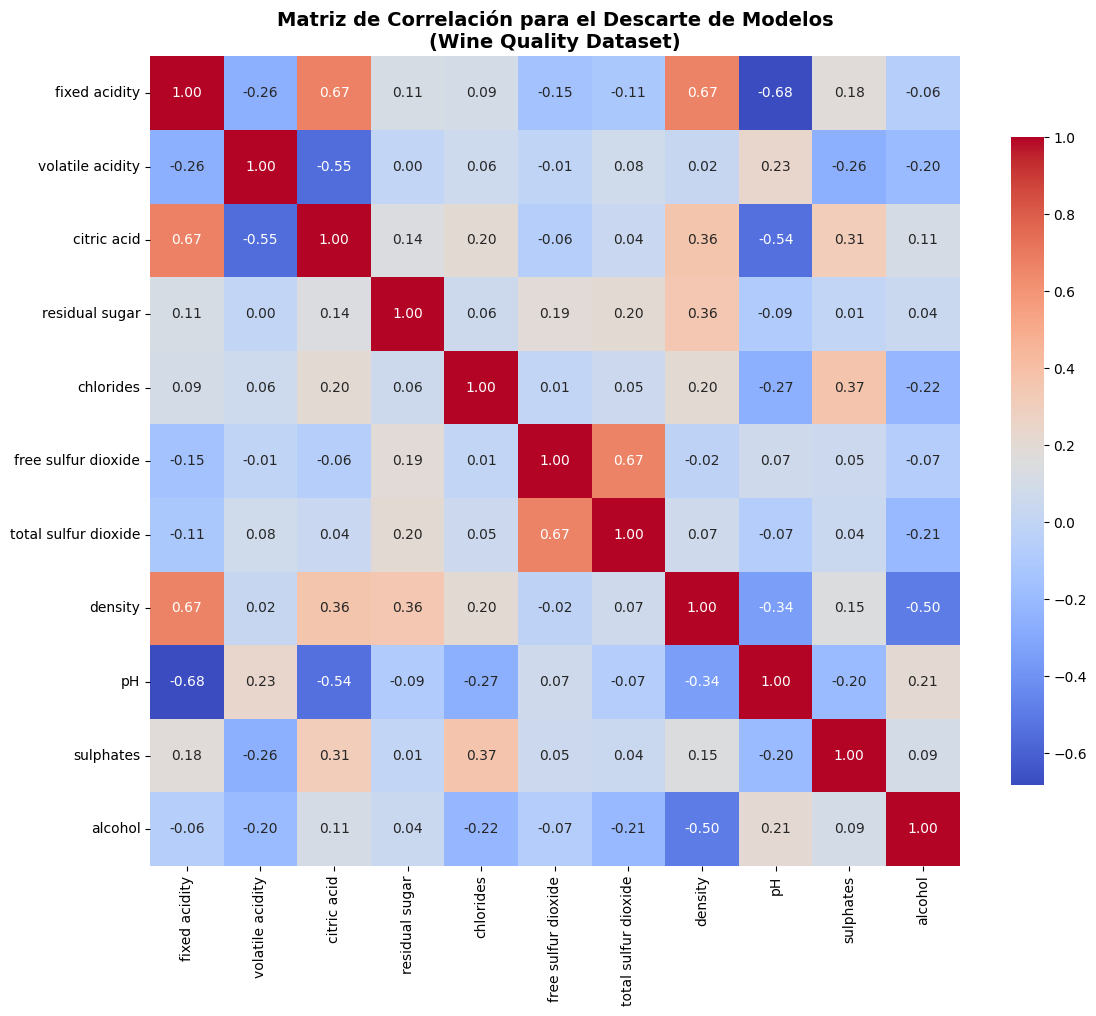

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación para el Descarte de Modelos\n(Wine Quality Dataset)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamaño conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño conjunto de entrenamiento: 1119 muestras
Tamaño conjunto de prueba: 480 muestras


In [18]:
def evaluar_modelo(modelo, X_tr, X_ts, y_tr, y_ts):
    """Entrena y evalúa un modelo y devuelve la precisión (accuracy)."""
    modelo.fit(X_tr, y_tr)
    pred = modelo.predict(X_ts)
    return accuracy_score(y_ts, pred)

resultados = {}

In [23]:
nb_model = GaussianNB()
resultados['Naïve Bayes (NB)'] = evaluar_modelo(nb_model, X_train, X_test, y_train, y_test)

knn_scaled_model = KNeighborsClassifier(n_neighbors=5)
resultados['KNN CON Escalar'] = evaluar_modelo(knn_scaled_model, X_train_scaled, X_test_scaled, y_train, y_test)

log_model = LogisticRegression(solver='liblinear', random_state=SEED, max_iter=1000)
resultados['Regresión Logística'] = evaluar_modelo(log_model, X_train_scaled, X_test_scaled, y_train, y_test)

tree_model = DecisionTreeClassifier(random_state=SEED, max_depth=10)
resultados['Árbol de Decisión'] = evaluar_modelo(tree_model, X_train, X_test, y_train, y_test)

In [25]:
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Precision'])
df_resultados = df_resultados.sort_values(by='Precision', ascending=False)
df_resultados['Precision (%)'] = (df_resultados['Precision'] * 100).round(2)

print("\n" + df_resultados.to_string(index=False))

print(f"Mejor Modelo: {df_resultados.iloc[0]['Modelo']} con {df_resultados.iloc[0]['Precision (%)']:.2f}%")
print(f"Peor Modelo:  {df_resultados.iloc[-1]['Modelo']} con {df_resultados.iloc[-1]['Precision (%)']:.2f}%")
print(f"Diferencia:     {(df_resultados.iloc[0]['Precision'] - df_resultados.iloc[-1]['Precision']) * 100:.2f}%")


             Modelo  Precision  Precision (%)
  Árbol de Decisión   0.741667          74.17
Regresión Logística   0.733333          73.33
    KNN CON Escalar   0.731250          73.12
   Naïve Bayes (NB)   0.722917          72.29
Mejor Modelo: Árbol de Decisión con 74.17%
Peor Modelo:  Naïve Bayes (NB) con 72.29%
Diferencia:     1.88%


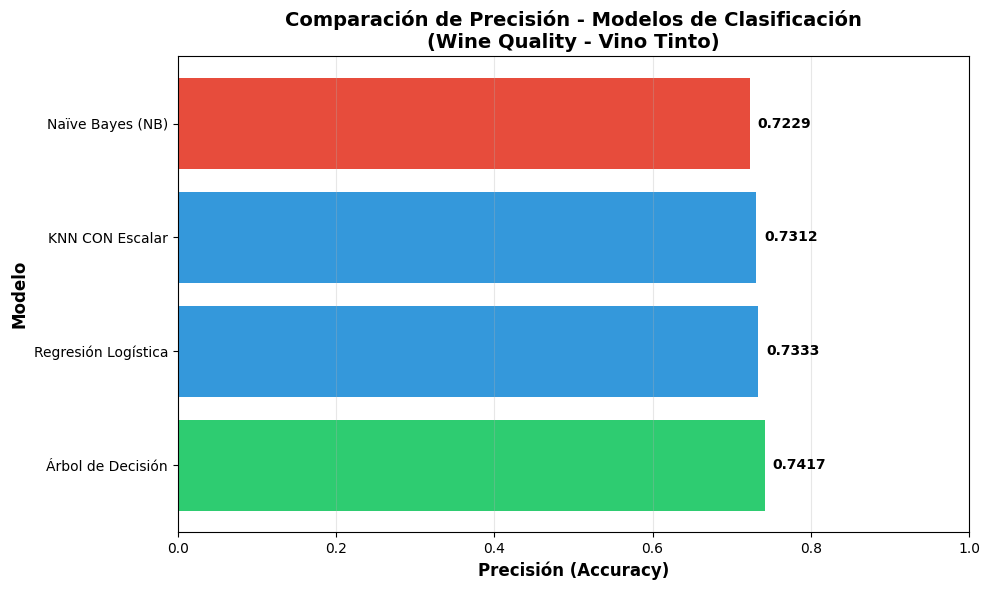

In [28]:
plt.figure(figsize=(10, 6))
colores = ['#2ecc71' if i == 0 else '#e74c3c' if i == len(df_resultados)-1 else '#3498db'
           for i in range(len(df_resultados))]
plt.barh(df_resultados['Modelo'], df_resultados['Precision'], color=colores)
plt.xlabel('Precisión (Accuracy)', fontsize=12, fontweight='bold')
plt.ylabel('Modelo', fontsize=12, fontweight='bold')
plt.title('Comparación de Precisión - Modelos de Clasificación\n(Wine Quality - Vino Tinto)',
          fontsize=14, fontweight='bold')
plt.xlim([0, 1])
for i, v in enumerate(df_resultados['Precision']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
tree_model = DecisionTreeClassifier(
    max_depth=10,              # Profundidad máxima del árbol
    min_samples_split=20,      # Muestras mínimas para dividir un nodo
    min_samples_leaf=10,       # Muestras mínimas en hoja
    random_state=SEED,
    criterion='gini'           # Criterio de división (gini o entropy)
)

tree_model.fit(X_train, y_train)

print(f"Información del modelo:")
print(f"  - Profundidad del árbol: {tree_model.get_depth()}")
print(f"  - Número de hojas: {tree_model.get_n_leaves()}")
print(f"  - Parámetro 'max_depth': {tree_model.max_depth}")

Información del modelo:
  - Profundidad del árbol: 10
  - Número de hojas: 59
  - Parámetro 'max_depth': 10


In [31]:
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Probabilidades para ROC-AUC
y_test_proba = tree_model.predict_proba(X_test)[:, 1]

# Métricas
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"PRECISIÓN (ACCURACY)")
print(f"Conjunto de entrenamiento: {accuracy_train:.4f} ({accuracy_train*100:.2f}%)")
print(f"Conjunto de prueba:        {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
print(f"Diferencia (Overfitting):  {(accuracy_train - accuracy_test)*100:.2f}%")

print(f"ROC-AUC SCORE")
print(f"ROC-AUC (Test): {roc_auc:.4f}")

print(f"REPORTE DE CLASIFICACIÓN")
print(classification_report(y_test, y_test_pred,
                          target_names=['Calidad BAJA', 'Calidad ALTA'],
                          digits=4))


PRECISIÓN (ACCURACY)
Conjunto de entrenamiento: 0.8231 (82.31%)
Conjunto de prueba:        0.7229 (72.29%)
Diferencia (Overfitting):  10.01%
ROC-AUC SCORE
ROC-AUC (Test): 0.8052
REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

Calidad BAJA     0.7064    0.6906    0.6984       223
Calidad ALTA     0.7366    0.7510    0.7437       257

    accuracy                         0.7229       480
   macro avg     0.7215    0.7208    0.7211       480
weighted avg     0.7226    0.7229    0.7227       480



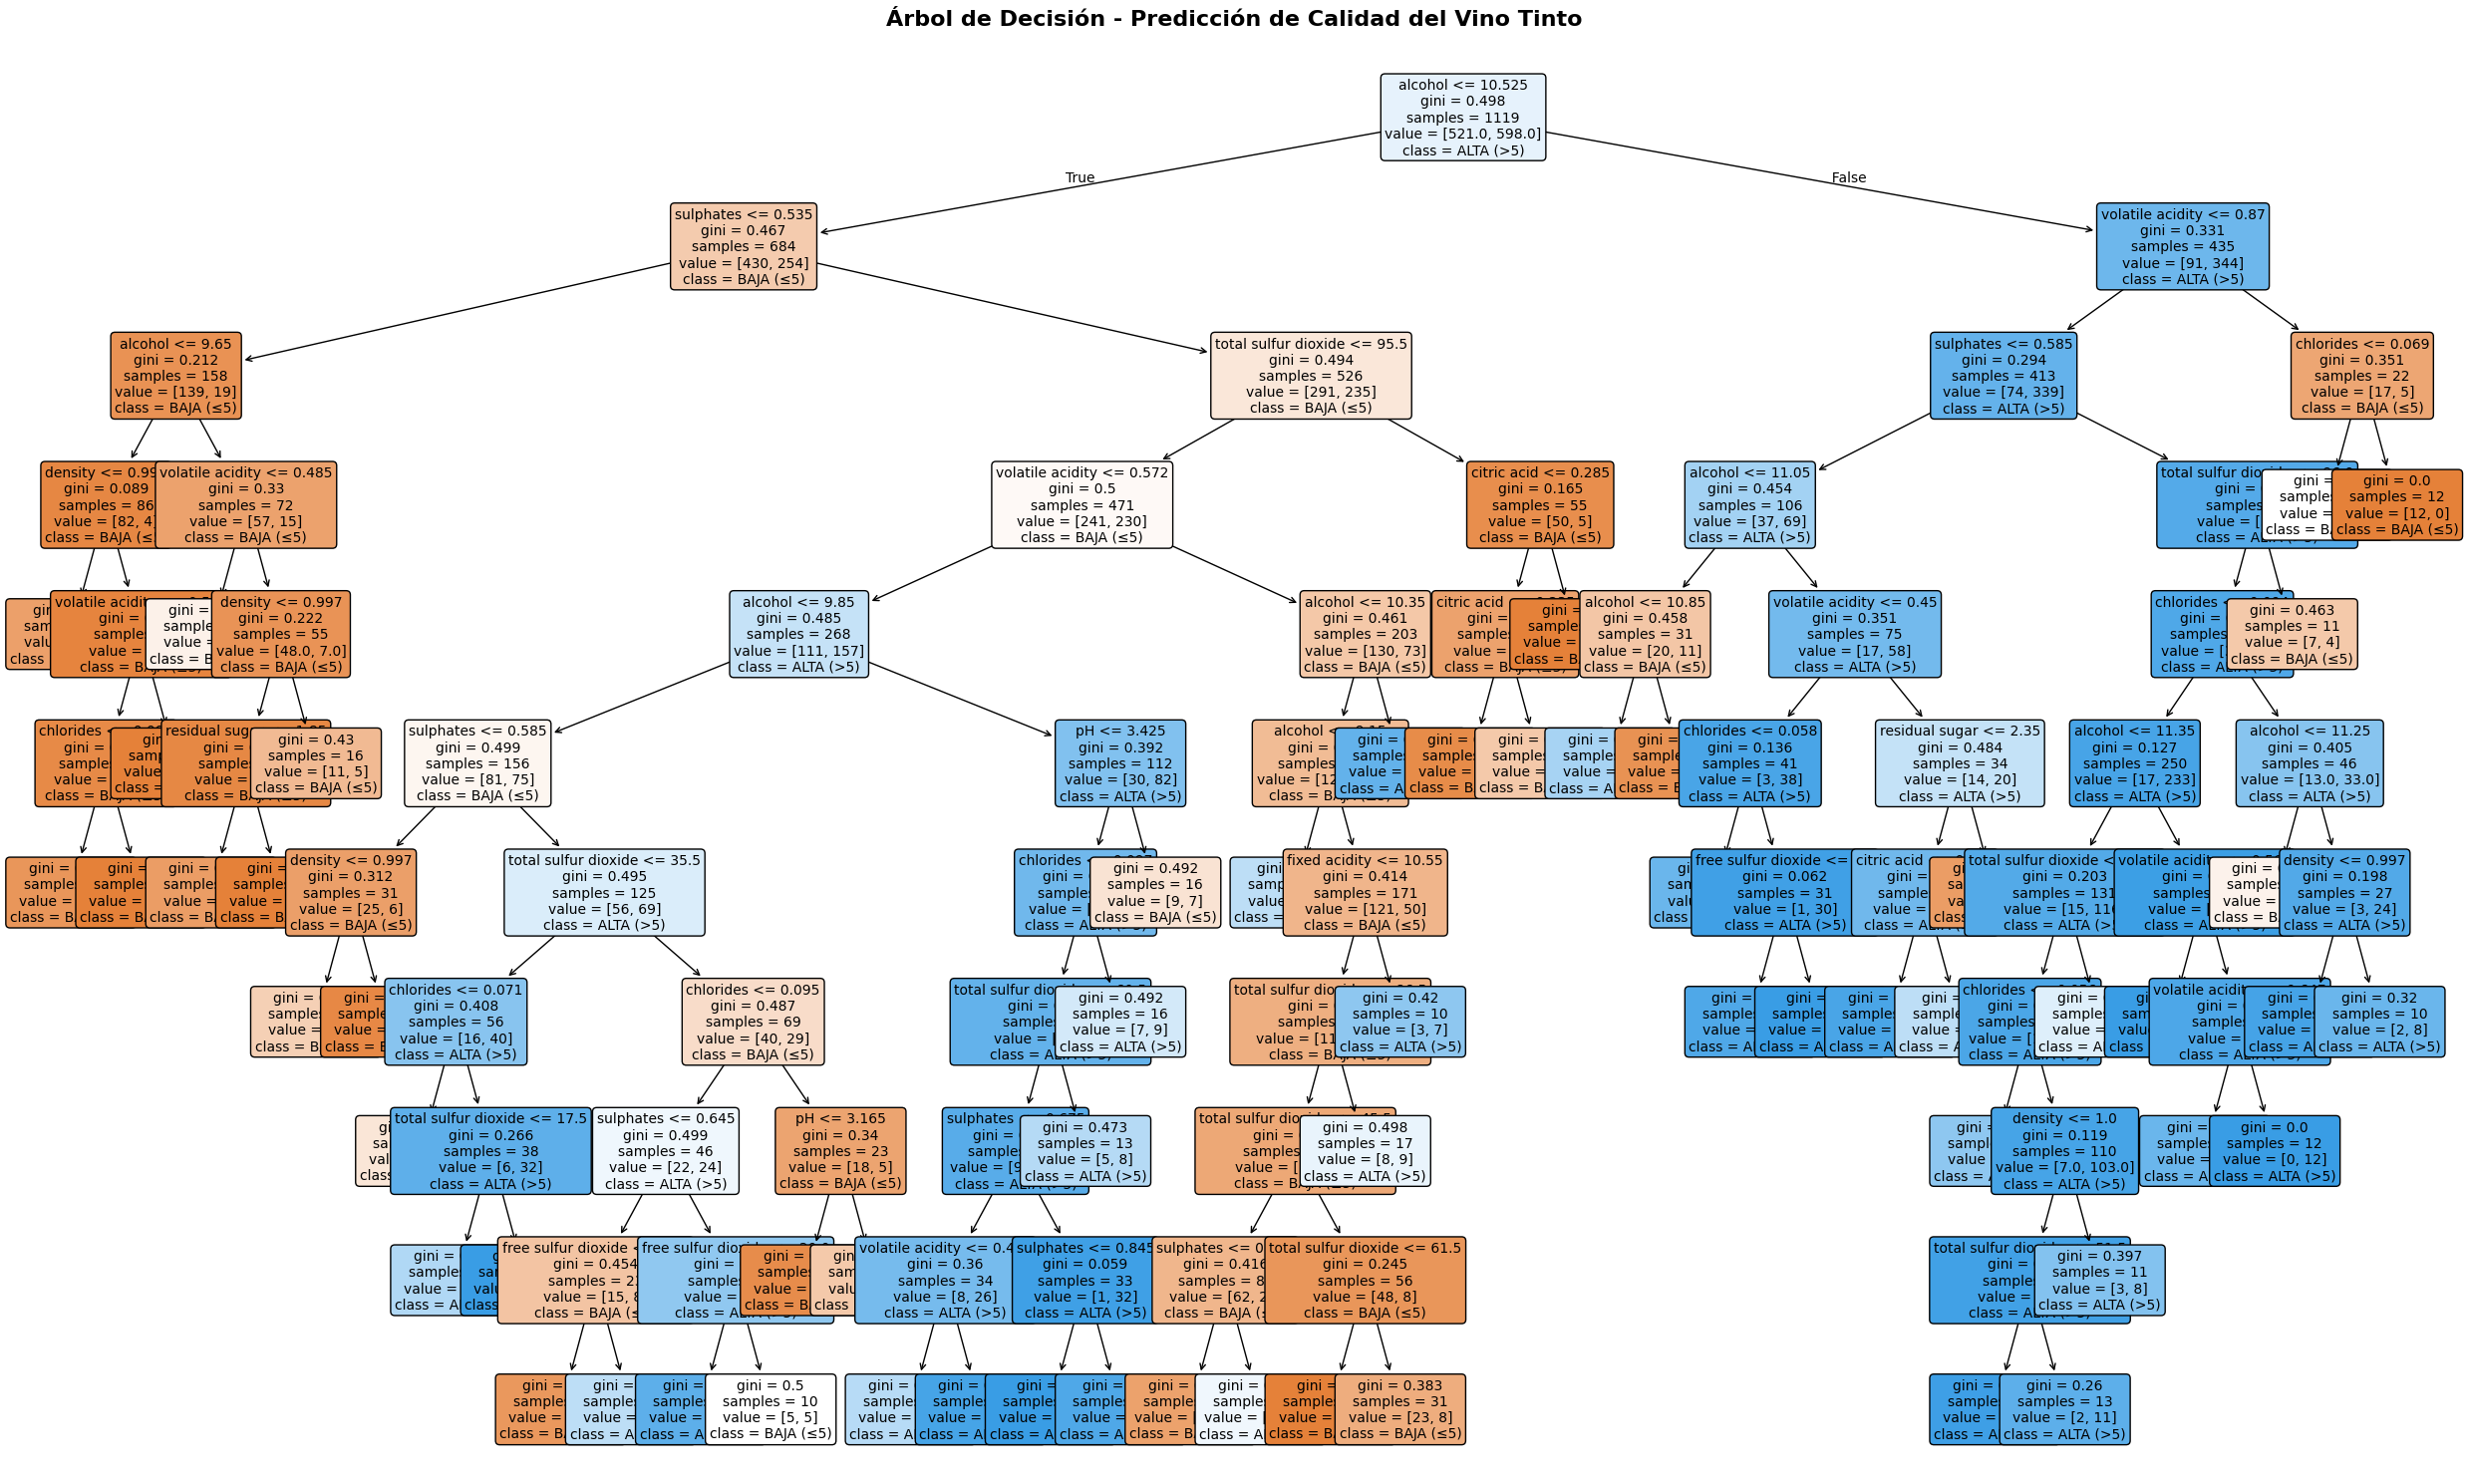

In [32]:
plt.figure(figsize=(25, 15))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=['BAJA (≤5)', 'ALTA (>5)'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Árbol de Decisión - Predicción de Calidad del Vino Tinto',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

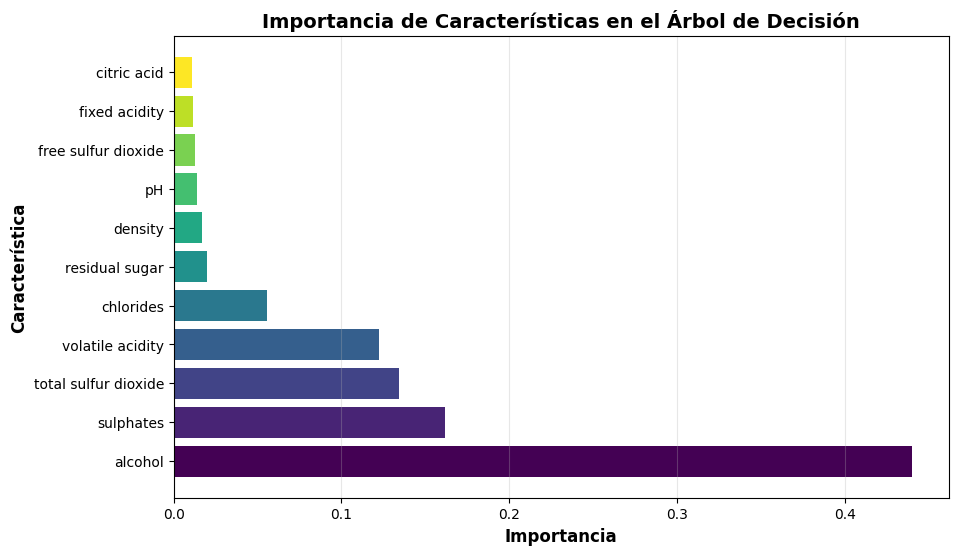

In [33]:
feature_importance = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': tree_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
plt.barh(feature_importance['Característica'], feature_importance['Importancia'], color=colors)
plt.xlabel('Importancia', fontsize=12, fontweight='bold')
plt.ylabel('Característica', fontsize=12, fontweight='bold')
plt.title('Importancia de Características en el Árbol de Decisión', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

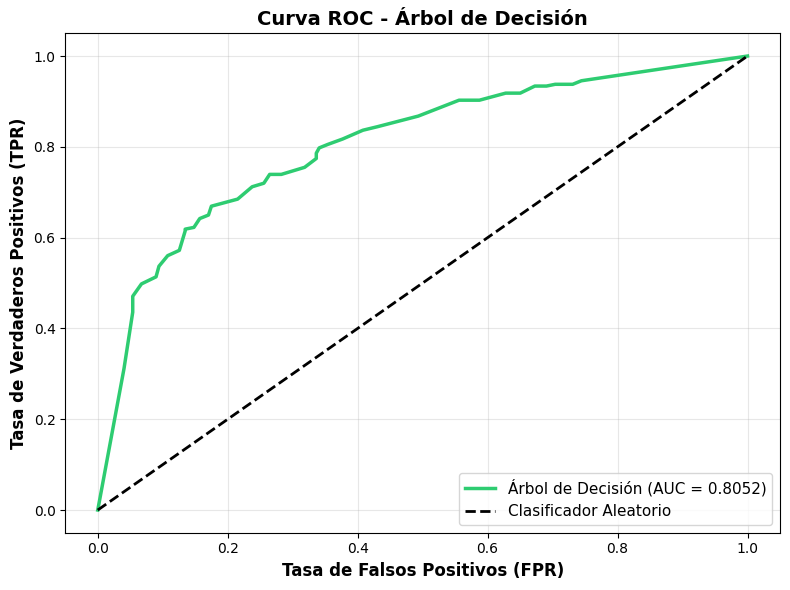

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Árbol de Decisión (AUC = {roc_auc:.4f})', linewidth=2.5, color='#2ecc71')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio', linewidth=2)
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12, fontweight='bold')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12, fontweight='bold')
plt.title('Curva ROC - Árbol de Decisión', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()